In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
store = pd.HDFStore('/home/kelleyld/OTB.h5')

In [3]:
moves = store.get('moves')

In [4]:
moves.head()

,GameID,Turn,Ply,MovedPiece,SourceCol,SourceRow,DestCol,DestRow,CapturedPiece,PromotionPiece,CheckState,CastleSide
0,1,w,1,P,4,1,4,3,NaN,NaN,NaN,NaN
1,1,b,2,p,3,6,3,4,NaN,NaN,NaN,NaN
2,1,w,3,P,4,3,3,4,p,NaN,NaN,NaN
3,1,b,4,q,3,7,3,4,P,NaN,NaN,NaN
4,1,w,5,N,1,0,2,2,NaN,NaN,NaN,NaN


# Get Taking Moves

In [5]:
taking_moves = moves.dropna(subset=['CapturedPiece'])

In [6]:
taking_moves.head()

,GameID,Turn,Ply,MovedPiece,SourceCol,SourceRow,DestCol,DestRow,CapturedPiece,PromotionPiece,CheckState,CastleSide
2,1,w,3,P,4,3,3,4,p,NaN,NaN,NaN
3,1,b,4,q,3,7,3,4,P,NaN,NaN,NaN
19,1,b,20,n,3,6,4,4,N,NaN,NaN,NaN
20,1,w,21,P,3,3,4,4,n,NaN,NaN,NaN
32,1,w,33,P,5,4,4,5,p,NaN,NaN,NaN


# Taken Counts Crosstab

In [7]:
taken_counts = pd.crosstab(moves['MovedPiece'], moves['CapturedPiece'])

In [8]:
taken_counts

CapturedPiece,B,N,P,Q,R,b,n,p,q,r
MovedPiece,,,,,,,,,,
B,0,0,0,0,0,2387384,2991746,2634389,312693,669008
K,0,0,0,0,0,398839,175095,719412,175078,353052
N,0,0,0,0,0,1421180,2475821,4062382,336258,504138
P,0,0,0,0,0,1562204,1638544,10124131,351160,398805
Q,0,0,0,0,0,1311901,1024610,2425453,1479176,716954
R,0,0,0,0,0,1105001,867699,2964833,673867,2985377
b,2339916,2995753,2348613,288934,668122,0,0,0,0,0
k,525665,221128,764637,199550,408565,0,0,0,0,0
n,1545114,2567753,3088865,342312,469324,0,0,0,0,0


In [9]:
white_pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
black_pieces = ['p', 'n', 'b', 'r', 'q', 'k']
pieces = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']

## White Takes

In [10]:
white_takes = taken_counts.loc[white_pieces, black_pieces]
white_takes

CapturedPiece,p,n,b,r,q,k
MovedPiece,,,,,,
P,10124131.0,1638544.0,1562204.0,398805.0,351160.0,NaN
N,4062382.0,2475821.0,1421180.0,504138.0,336258.0,NaN
B,2634389.0,2991746.0,2387384.0,669008.0,312693.0,NaN
R,2964833.0,867699.0,1105001.0,2985377.0,673867.0,NaN
Q,2425453.0,1024610.0,1311901.0,716954.0,1479176.0,NaN
K,719412.0,175095.0,398839.0,353052.0,175078.0,NaN


## Black Takes

In [11]:
black_takes = taken_counts.loc[black_pieces, white_pieces]
black_takes

CapturedPiece,P,N,B,R,Q,K
MovedPiece,,,,,,
p,11231569.0,1666833.0,1629129.0,407666.0,366392.0,NaN
n,3088865.0,2567753.0,1545114.0,469324.0,342312.0,NaN
b,2348613.0,2995753.0,2339916.0,668122.0,288934.0,NaN
r,2815719.0,825135.0,1039812.0,2906959.0,626927.0,NaN
q,2399726.0,899320.0,1176695.0,712363.0,1480283.0,NaN
k,764637.0,221128.0,525665.0,408565.0,199550.0,NaN


## Total Takes

In [12]:
total_takes = pd.DataFrame(white_takes.values + black_takes.values)

In [13]:
total_takes.index = pieces
total_takes.columns = pieces
total_takes = total_takes.dropna(axis=1)
total_takes

,Pawn,Knight,Bishop,Rook,Queen
Pawn,21355700.0,3305377.0,3191333.0,806471.0,717552.0
Knight,7151247.0,5043574.0,2966294.0,973462.0,678570.0
Bishop,4983002.0,5987499.0,4727300.0,1337130.0,601627.0
Rook,5780552.0,1692834.0,2144813.0,5892336.0,1300794.0
Queen,4825179.0,1923930.0,2488596.0,1429317.0,2959459.0
King,1484049.0,396223.0,924504.0,761617.0,374628.0


### Which Pieces Take ____ ?

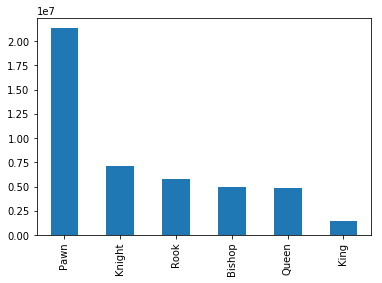

In [14]:
total_takes['Pawn'].sort_values(ascending=False).plot.bar()

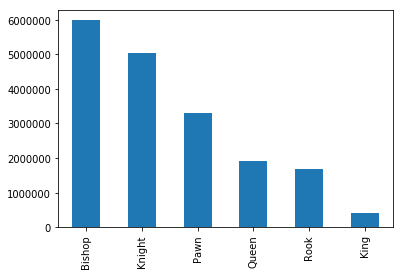

In [15]:
total_takes['Knight'].sort_values(ascending=False).plot.bar()

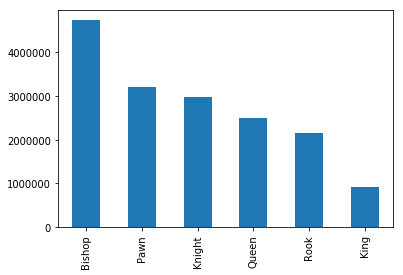

In [16]:
total_takes['Bishop'].sort_values(ascending=False).plot.bar()

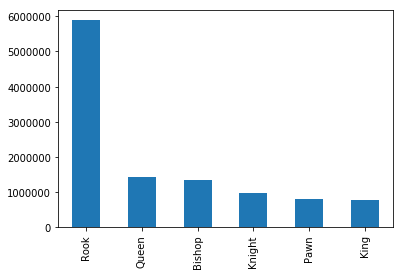

In [17]:
total_takes['Rook'].sort_values(ascending=False).plot.bar()

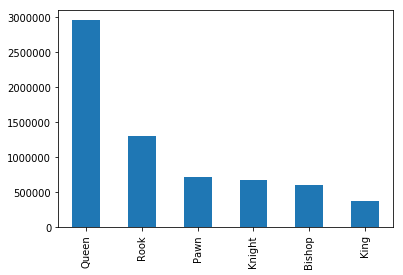

In [18]:
total_takes['Queen'].sort_values(ascending=False).plot.bar()

### Which Pieces are Taken by ____ ?

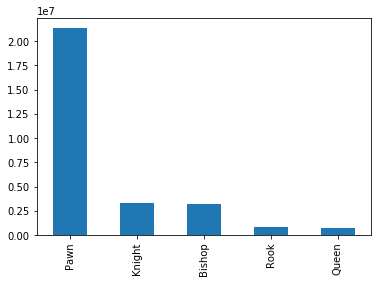

In [19]:
total_takes.T['Pawn'].sort_values(ascending=False).plot.bar()

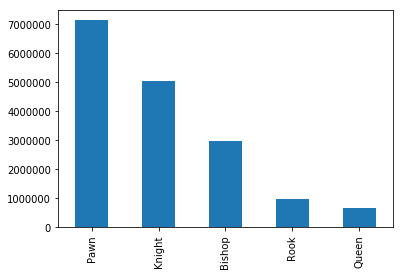

In [20]:
total_takes.T['Knight'].sort_values(ascending=False).plot.bar()

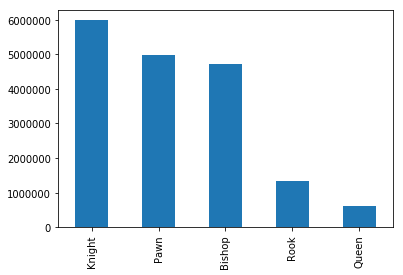

In [21]:
total_takes.T['Bishop'].sort_values(ascending=False).plot.bar()

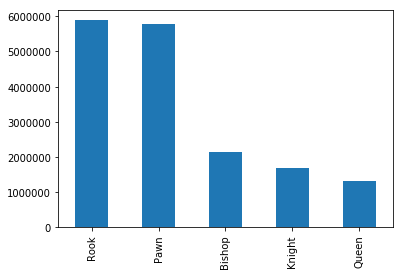

In [22]:
total_takes.T['Rook'].sort_values(ascending=False).plot.bar()

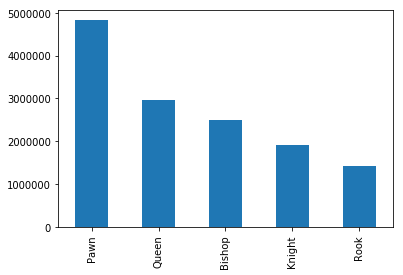

In [23]:
total_takes.T['Queen'].sort_values(ascending=False).plot.bar()

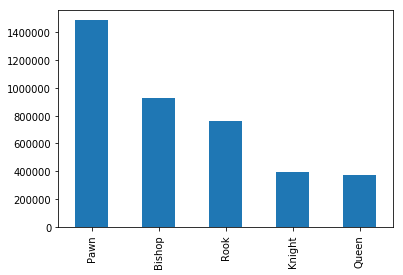

In [24]:
total_takes.T['King'].sort_values(ascending=False).plot.bar()

## Difference in White and Black Takes

In [25]:
diff_takes = pd.DataFrame(white_takes.values - black_takes.values)

In [26]:
diff_takes.index = pieces
diff_takes.columns = pieces
diff_takes = diff_takes.dropna(axis=1)
diff_takes

,Pawn,Knight,Bishop,Rook,Queen
Pawn,-1107438.0,-28289.0,-66925.0,-8861.0,-15232.0
Knight,973517.0,-91932.0,-123934.0,34814.0,-6054.0
Bishop,285776.0,-4007.0,47468.0,886.0,23759.0
Rook,149114.0,42564.0,65189.0,78418.0,46940.0
Queen,25727.0,125290.0,135206.0,4591.0,-1107.0
King,-45225.0,-46033.0,-126826.0,-55513.0,-24472.0


### Which Pieces Take ____ ?

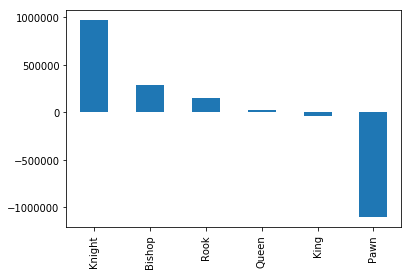

In [27]:
diff_takes['Pawn'].sort_values(ascending=False).plot.bar()

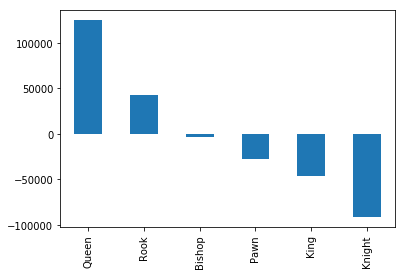

In [28]:
diff_takes['Knight'].sort_values(ascending=False).plot.bar()

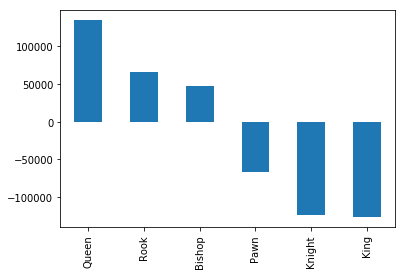

In [29]:
diff_takes['Bishop'].sort_values(ascending=False).plot.bar()

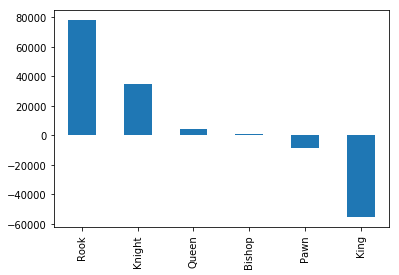

In [30]:
diff_takes['Rook'].sort_values(ascending=False).plot.bar()

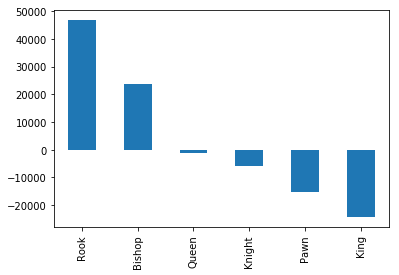

In [31]:
diff_takes['Queen'].sort_values(ascending=False).plot.bar()

### Which Pieces are Taken by ____ ?

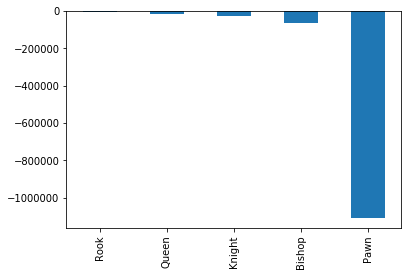

In [32]:
diff_takes.T['Pawn'].sort_values(ascending=False).plot.bar()

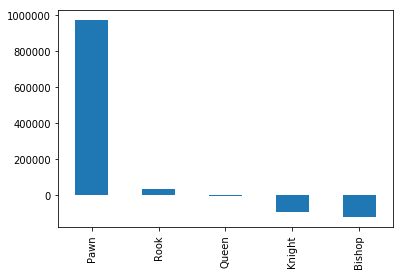

In [33]:
diff_takes.T['Knight'].sort_values(ascending=False).plot.bar()

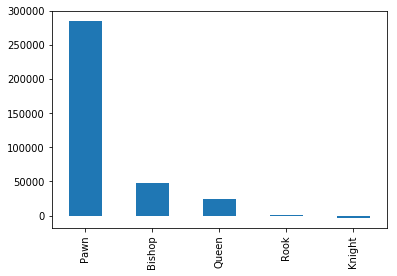

In [34]:
diff_takes.T['Bishop'].sort_values(ascending=False).plot.bar()

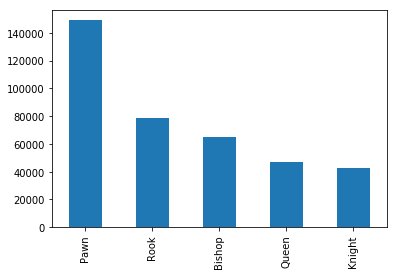

In [35]:
diff_takes.T['Rook'].sort_values(ascending=False).plot.bar()

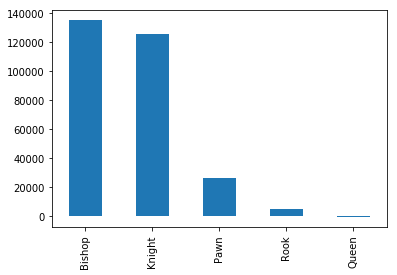

In [36]:
diff_takes.T['Queen'].sort_values(ascending=False).plot.bar()

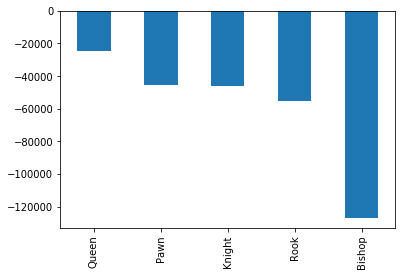

In [37]:
diff_takes.T['King'].sort_values(ascending=False).plot.bar()

# Piece Taking Locations

In [38]:
def flip_board(board):
    return board.iloc[::-1, :]

In [39]:
def taking_heatmaps(white_piece, black_piece, taking=True):
    if taking:
        piece_col = 'MovedPiece'
    else:
        piece_col = 'CapturedPiece'
    piece_taking_moves = pd.concat([taking_moves[taking_moves[piece_col] == white_piece],
                                    taking_moves[taking_moves[piece_col] == black_piece]])
    
    source_taking_map = pd.crosstab(piece_taking_moves['SourceRow'], piece_taking_moves['SourceCol'], normalize=True)
    source_taking_map = flip_board(source_taking_map)
    
    dest_taking_map = pd.crosstab(piece_taking_moves['DestRow'], piece_taking_moves['DestCol'], normalize=True)
    dest_taking_map = flip_board(dest_taking_map)
    
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14, 5))
    axes[0].set_title('Source')
    axes[1].set_title('Destination')
    
    sns.heatmap(source_taking_map, annot=True, ax=axes[0])
    sns.heatmap(dest_taking_map, annot=True, ax=axes[1])

## Pawn Taking

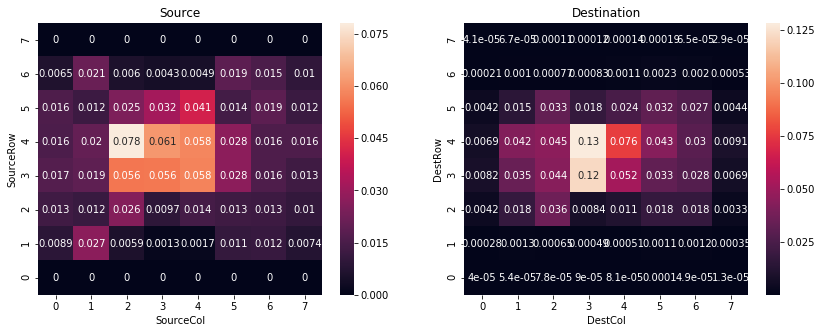

In [40]:
taking_heatmaps('p', 'P')

## Pawn Taken

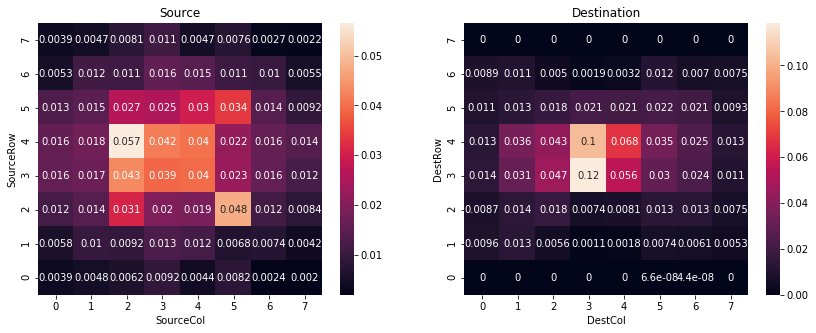

In [41]:
taking_heatmaps('p', 'P', False)

## Knight Taking

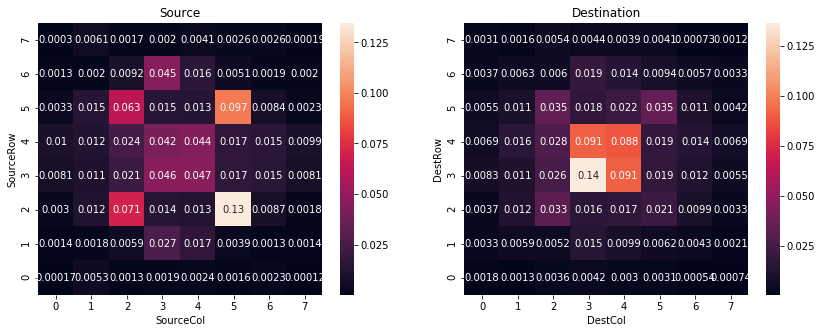

In [42]:
taking_heatmaps('n', 'N')

## Knight Taken

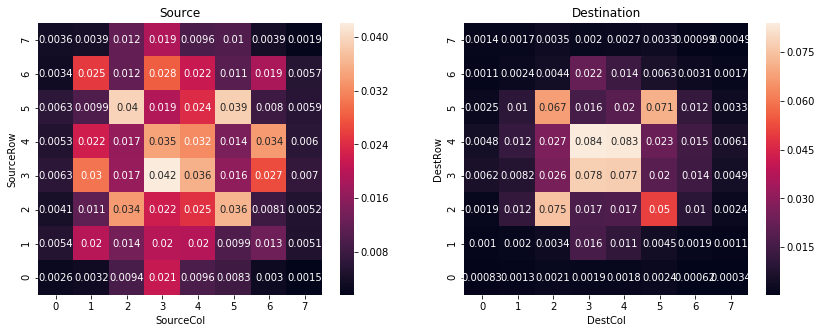

In [43]:
taking_heatmaps('n', 'N', False)

## Bishop Taking

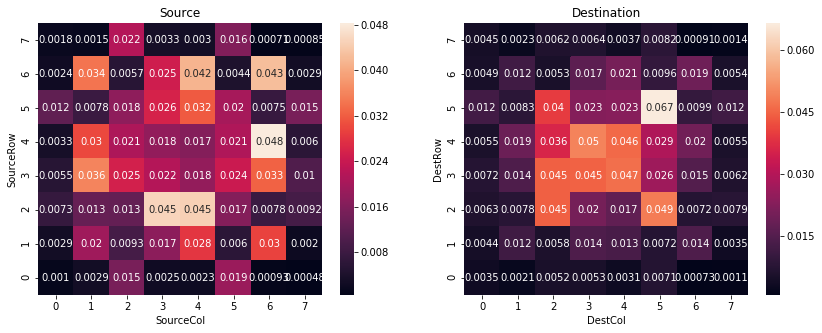

In [44]:
taking_heatmaps('b', 'B')

## Bishop Taken

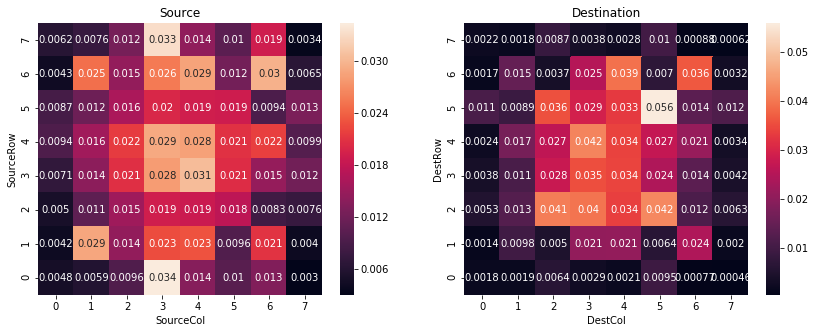

In [45]:
taking_heatmaps('b', 'B', False)

## Rook Taking

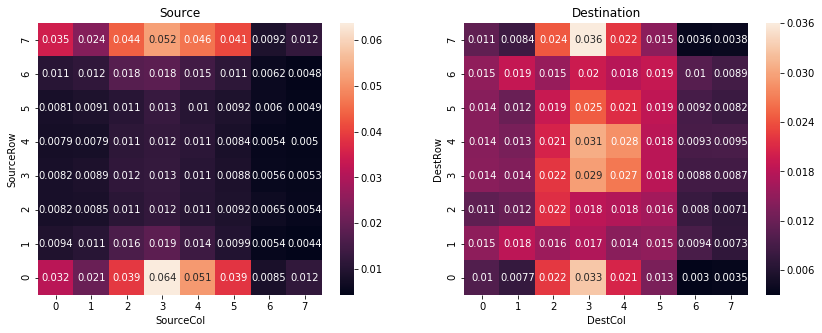

In [46]:
taking_heatmaps('r', 'R')

## Rook Taken

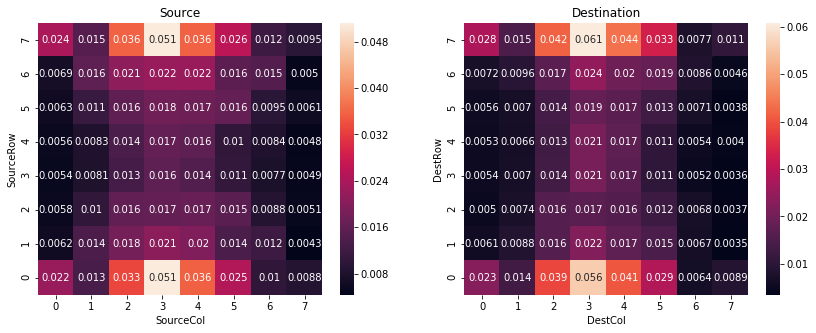

In [47]:
taking_heatmaps('r', 'R', False)

## Queen Taking

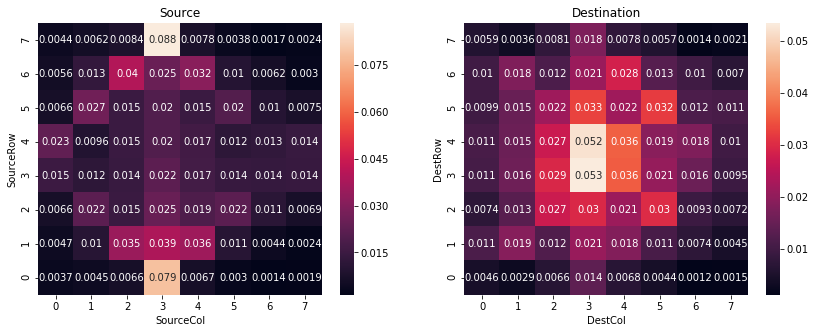

In [48]:
taking_heatmaps('q', 'Q')

## Queen Taken

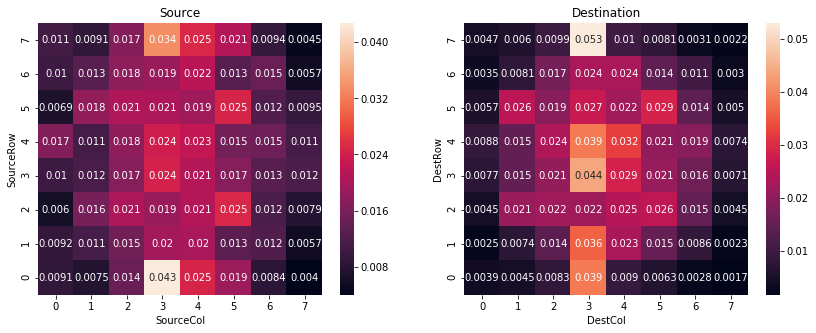

In [49]:
taking_heatmaps('q', 'Q', False)

## King Taking

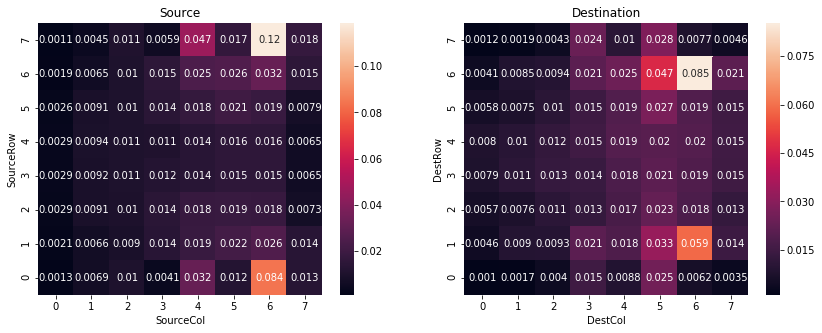

In [50]:
taking_heatmaps('k', 'K')

# Check(mate) Locations

In [51]:
checking_moves = moves.dropna(subset=['CheckState'])

In [52]:
checking_moves.head()

,GameID,Turn,Ply,MovedPiece,SourceCol,SourceRow,DestCol,DestRow,CapturedPiece,PromotionPiece,CheckState,CastleSide
40,1,w,41,B,4,5,3,6,n,NaN,+,NaN
49,1,b,50,q,0,4,0,2,NaN,NaN,+,NaN
52,1,w,53,Q,6,5,4,7,r,NaN,+,NaN
166,2,b,114,q,2,1,3,0,NaN,NaN,+,NaN
177,2,w,125,R,4,5,4,7,NaN,NaN,+,NaN


## All Check(mates)

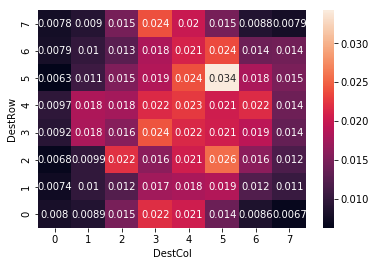

In [53]:
checking_map = pd.crosstab(checking_moves['DestRow'], checking_moves['DestCol'], normalize=True)
checking_map = flip_board(checking_map)
sns.heatmap(checking_map, annot=True)

## White Check(mates)

In [54]:
white_checking_moves = checking_moves[checking_moves['Turn'] == 'w']

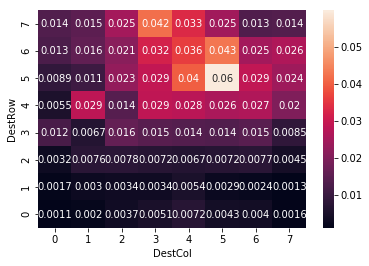

In [55]:
white_checking_map = pd.crosstab(white_checking_moves['DestRow'], white_checking_moves['DestCol'], normalize=True)
white_checking_map = flip_board(white_checking_map)
sns.heatmap(white_checking_map, annot=True)

## Black Check(mates)

In [56]:
black_checking_moves = checking_moves[checking_moves['Turn'] == 'b']

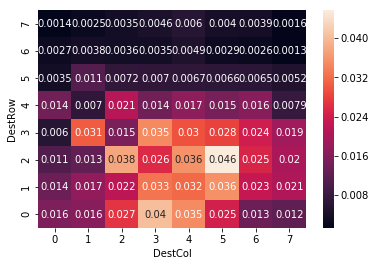

In [57]:
black_checking_map = pd.crosstab(black_checking_moves['DestRow'], black_checking_moves['DestCol'], normalize=True)
black_checking_map = flip_board(black_checking_map)
sns.heatmap(black_checking_map, annot=True)